데이터셋 : Toyota Corolla
- 1,2번째 행 제외 
- 7번쨰 행 CATEGORY->BINARY
- target variable: Price

목적: 다중선형회귀 vs 의사결정나무 성능 비교

1. 모듈 불러오기

In [47]:
#데이터 전처리 패키지 
import numpy as np 
import pandas as pd 
#기계학습 모델 구축 및 평가 패키지 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.linear_model import LinearRegression

#데이터 시각화 패키지 
from matplotlib import pyplot as plt  
%matplotlib inline

#warning 무시
import warnings
warnings.filterwarnings(action='ignore')

#한글 폰트 설정
plt.rc('font',family='Malgun Gothic')

2. 평가(성능) 지표 생성 

In [62]:
#Performance Evaluation Function
def perf_eval(tgt_y,pre_y):
    #RMSE
    rmse= np.sqrt(np.mean((tgt_y-pre_y)**2))
    #MAE
    mae= np.mean(np.abs(tgt_y-pre_y))
    #MAPE
    mape=100*np.mean(np.abs((tgt_y-pre_y)/tgt_y))
    
    return rmse,mae,mape

In [63]:
#Performance table
Perf_Table = pd.DataFrame(index=['MLR','Regression Tree'],columns=["RMSE","MAE","MAPE"])
Perf_Table

,RMSE,MAE,MAPE
MLR,NaN,NaN,NaN
Regression Tree,NaN,NaN,NaN


3. 데이터셋 불러옴 
- 범주형 데이터 -> 이산형 데이터 (전처리)

In [64]:
#Load data - Preprocessing
corolla=pd.read_csv("ToyotaCorolla.csv")
target_column='Price'
corolla_target=corolla[target_column]

In [65]:
#Transform a categorial variable into a set of binary variables
category_idx=7
corolla = pd.get_dummies(corolla,
                        columns=[corolla.columns[category_idx]],
                        prefix='',
                        prefix_sep='')
corolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,90,1,0,...,0,0,0,1,0,0,0,0,1,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,90,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,90,1,0,...,0,0,0,1,0,0,0,0,1,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,90,0,0,...,0,0,0,1,0,0,0,0,1,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,90,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,86,1,0,...,0,1,1,1,0,0,0,0,0,1
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,86,0,0,...,0,0,1,1,0,0,0,0,0,1
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,86,0,0,...,0,0,0,1,0,0,0,0,0,1
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,86,1,0,...,0,0,0,1,0,0,0,0,0,1


In [66]:
#Prepare the data 
id_idx=[0,1]
corolla_input_p=corolla.drop(corolla.columns[id_idx],axis=1)
corolla_input=corolla_input_p.drop(target_column,axis=1)
corolla_input

,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,23,10,2002,46986,90,1,0,2000,3,4,...,0,0,0,1,0,0,0,0,1,0
1,23,10,2002,72937,90,1,0,2000,3,4,...,0,0,0,1,0,0,0,0,1,0
2,24,9,2002,41711,90,1,0,2000,3,4,...,0,0,0,1,0,0,0,0,1,0
3,26,7,2002,48000,90,0,0,2000,3,4,...,0,0,0,1,0,0,0,0,1,0
4,30,3,2002,38500,90,0,0,2000,3,4,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,12,1998,20544,86,1,0,1300,3,4,...,0,1,1,1,0,0,0,0,0,1
1432,72,9,1998,19000,86,0,0,1300,3,4,...,0,0,1,1,0,0,0,0,0,1
1433,71,10,1998,17016,86,0,0,1300,3,4,...,0,0,0,1,0,0,0,0,0,1
1434,70,11,1998,16916,86,1,0,1300,3,4,...,0,0,0,1,0,0,0,0,0,1


In [67]:
corolla_input,corolla_target

(      Age_08_04  Mfg_Month  Mfg_Year     KM   HP  Met_Color  Automatic    cc  \
 0            23         10      2002  46986   90          1          0  2000   
 1            23         10      2002  72937   90          1          0  2000   
 2            24          9      2002  41711   90          1          0  2000   
 3            26          7      2002  48000   90          0          0  2000   
 4            30          3      2002  38500   90          0          0  2000   
 ...         ...        ...       ...    ...  ...        ...        ...   ...   
 1431         69         12      1998  20544   86          1          0  1300   
 1432         72          9      1998  19000   86          0          0  1300   
 1433         71         10      1998  17016   86          0          0  1300   
 1434         70         11      1998  16916   86          1          0  1300   
 1435         76          5      1998      1  110          0          0  1600   
 
       Doors  Cylinders  .

4. 모델 구축 (MLR)

In [68]:
X_train,X_test,y_train,y_test = train_test_split(corolla_input,corolla_target,test_size=0.3,random_state=12345) 
MLP_corolla=LinearRegression().fit(X_train,y_train)
y_pred=MLP_corolla.predict(X_test)
Perf_Table.iloc[0]=perf_eval(y_test,y_pred)
Perf_Table

,RMSE,MAE,MAPE
MLR,1219.170176,874.365151,8.648188
Regression Tree,NaN,NaN,NaN


5.모델 구축(Decission Tree)

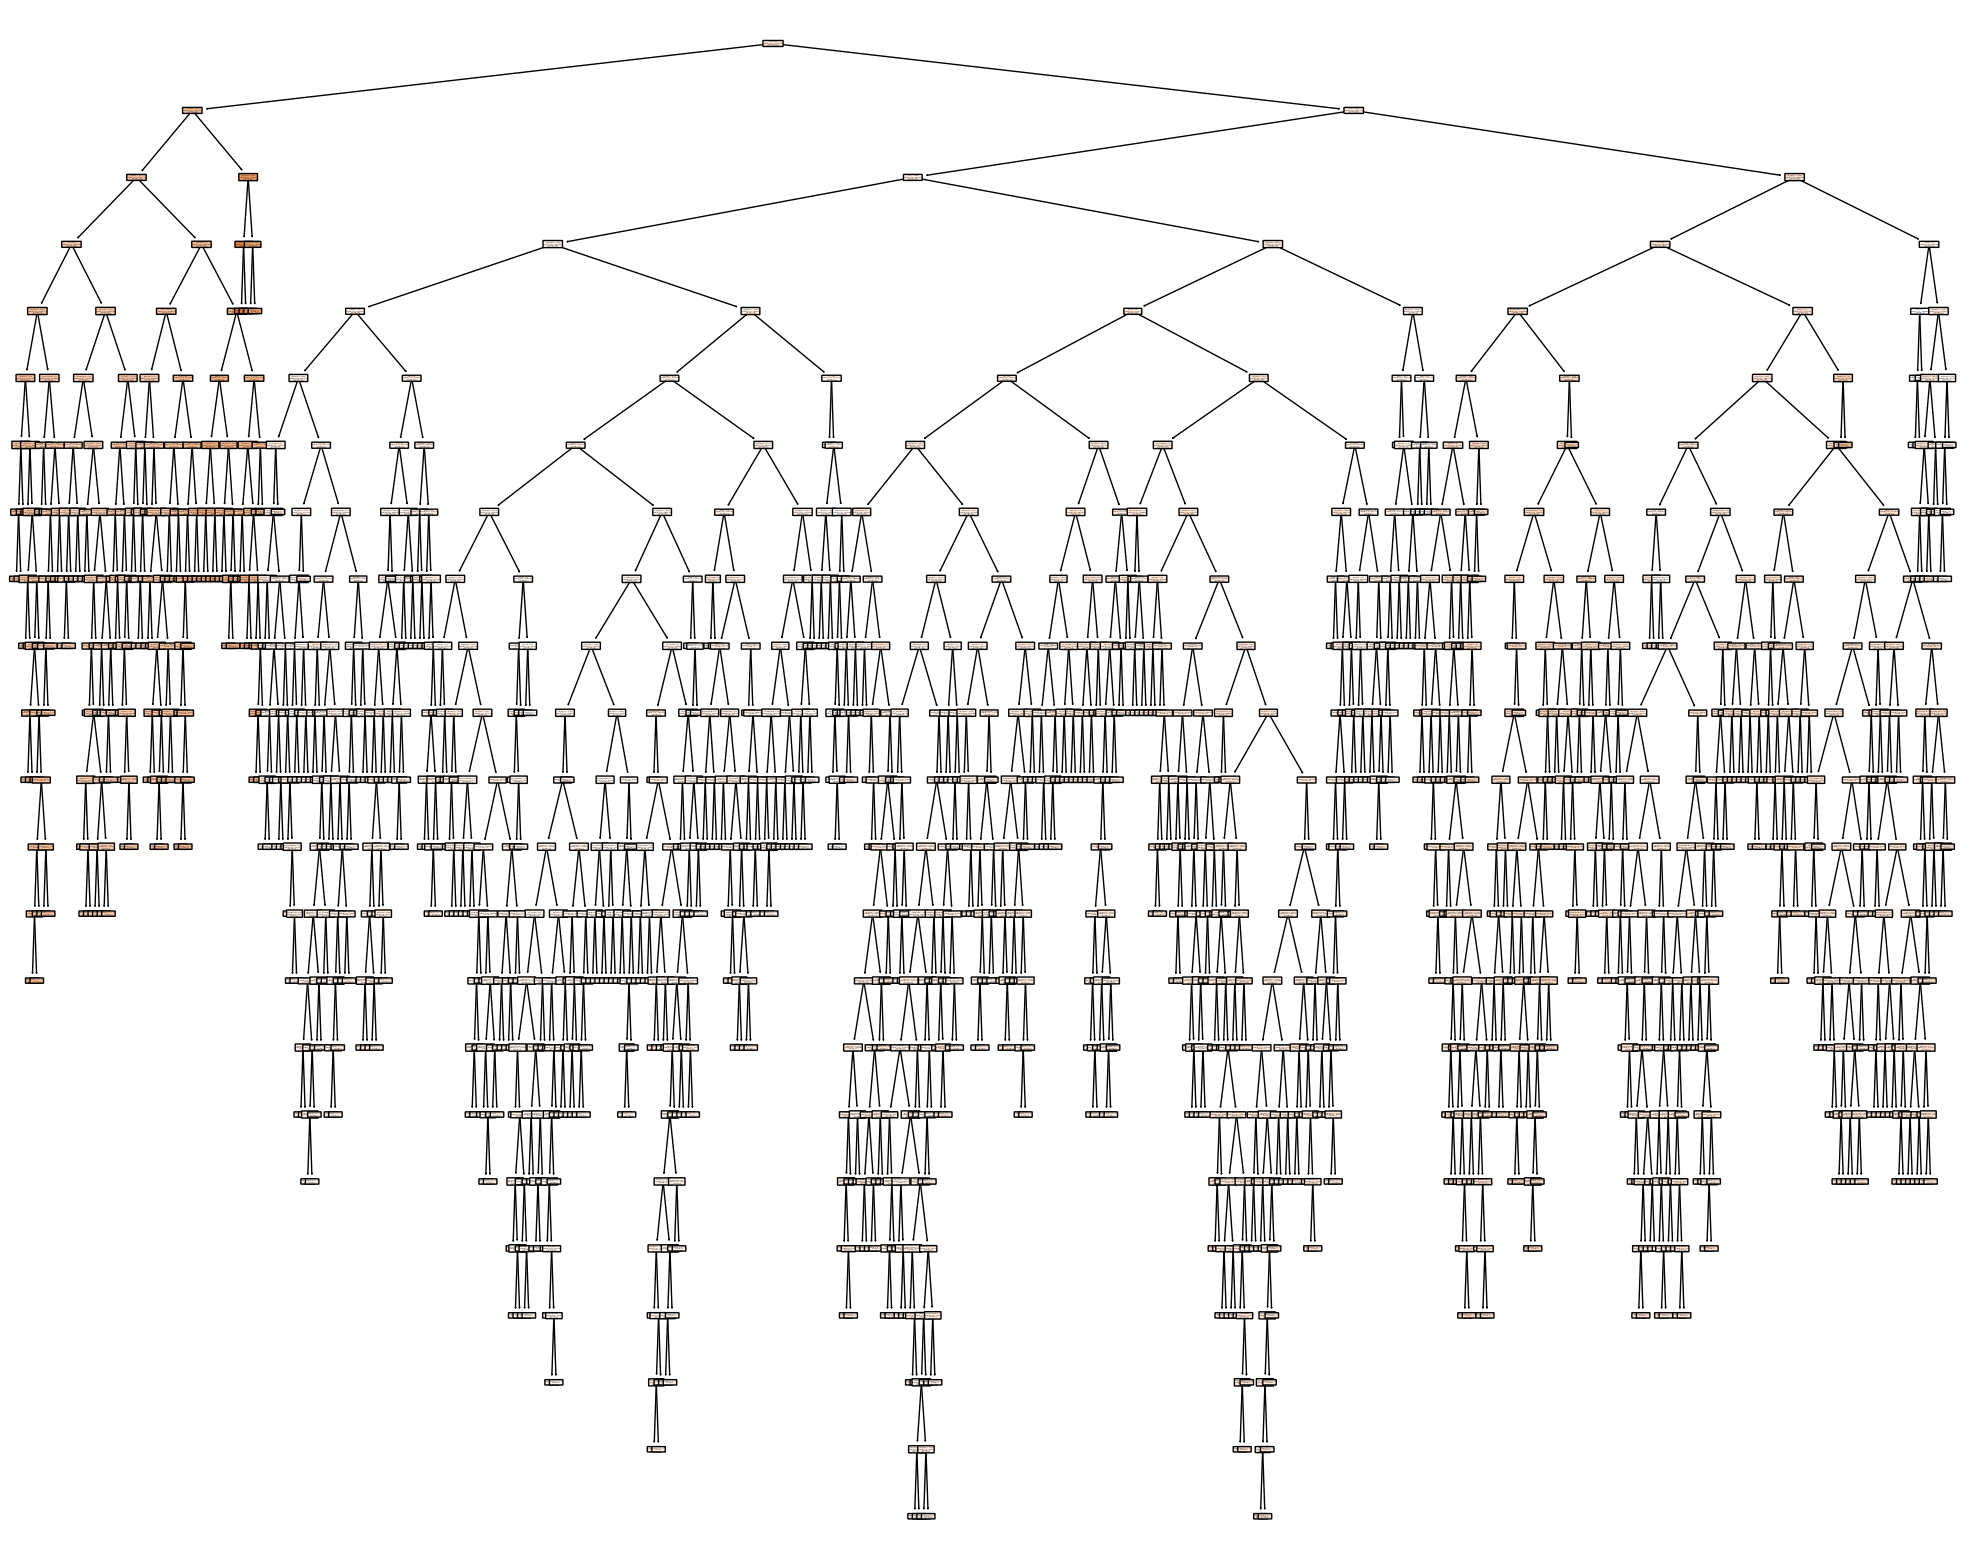

In [75]:
RT_corolla=DecisionTreeRegressor(random_state=12345)
RT_corolla.fit(X_train,y_train)
y_pred=RT_corolla.predict(X_test)


#plot the tree
fig=plt.figure(figsize=(25,20))
_=plot_tree(RT_corolla,
            feature_names=corolla.columns.values,
            rounded=True,
            filled =True 
           )
plt.show()

->pruning 통해서 최적의 의사결정 나무 찾기 

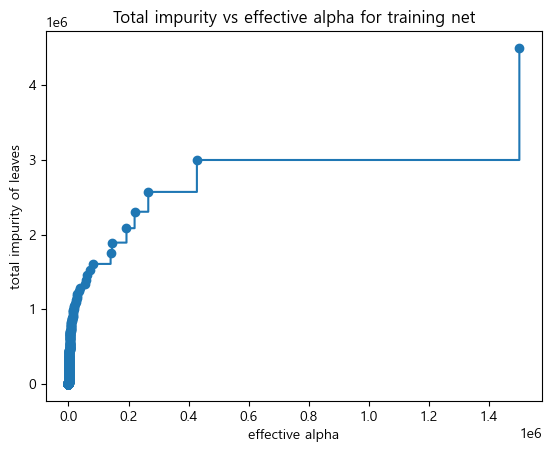

In [69]:
path=RT_corolla.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
fig,ax= plt.subplots()
ax.plot(ccp_alphas[:-1],impurities[:-1],marker='o',drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total impurity vs effective alpha for training net')
plt.show()

Number of nodes in the last tree is : 3 with ccp_alpha : 1500839.3169973064


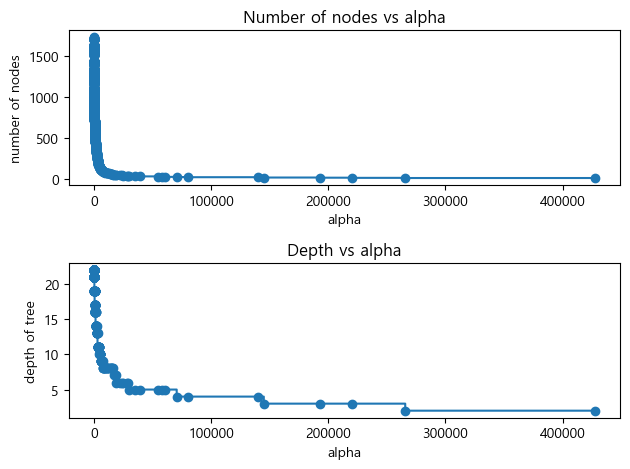

In [72]:
regs=[]
for ccp_alpha in ccp_alphas:
    reg=DecisionTreeRegressor(random_state=12345,ccp_alpha=ccp_alpha)
    reg.fit(X_train,y_train)
    regs.append(reg)
print(
    f"Number of nodes in the last tree is : {regs[-1].tree_.node_count} with ccp_alpha : {ccp_alphas[-1]}"
)
regs=regs[:-1]
ccp_alphas=ccp_alphas[:-1]

node_counts = [reg.tree_.node_count for reg in regs]
depth = [reg.tree_.max_depth for reg in regs]
fig,ax =plt.subplots(2,1)
ax[0].plot(ccp_alphas,node_counts,marker='o',drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title('Number of nodes vs alpha')
ax[1].plot(ccp_alphas,depth,marker='o',drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of tree')
ax[1].set_title('Depth vs alpha')
fig.tight_layout()

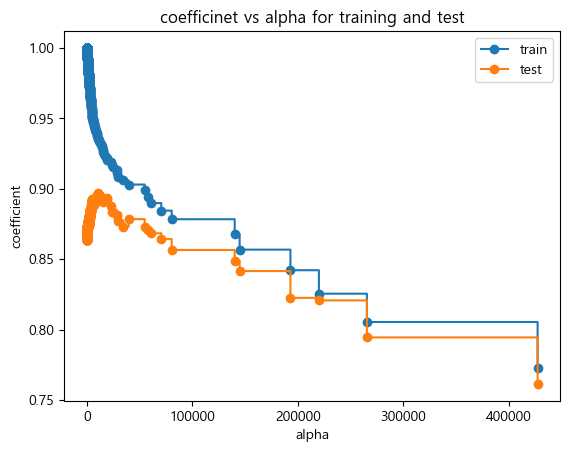

In [73]:
train_scores = [reg.score(X_train,y_train) for reg in regs]
test_scores = [reg.score(X_test,y_test) for reg in regs]

fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('coefficient')
ax.set_title('coefficinet vs alpha for training and test')
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

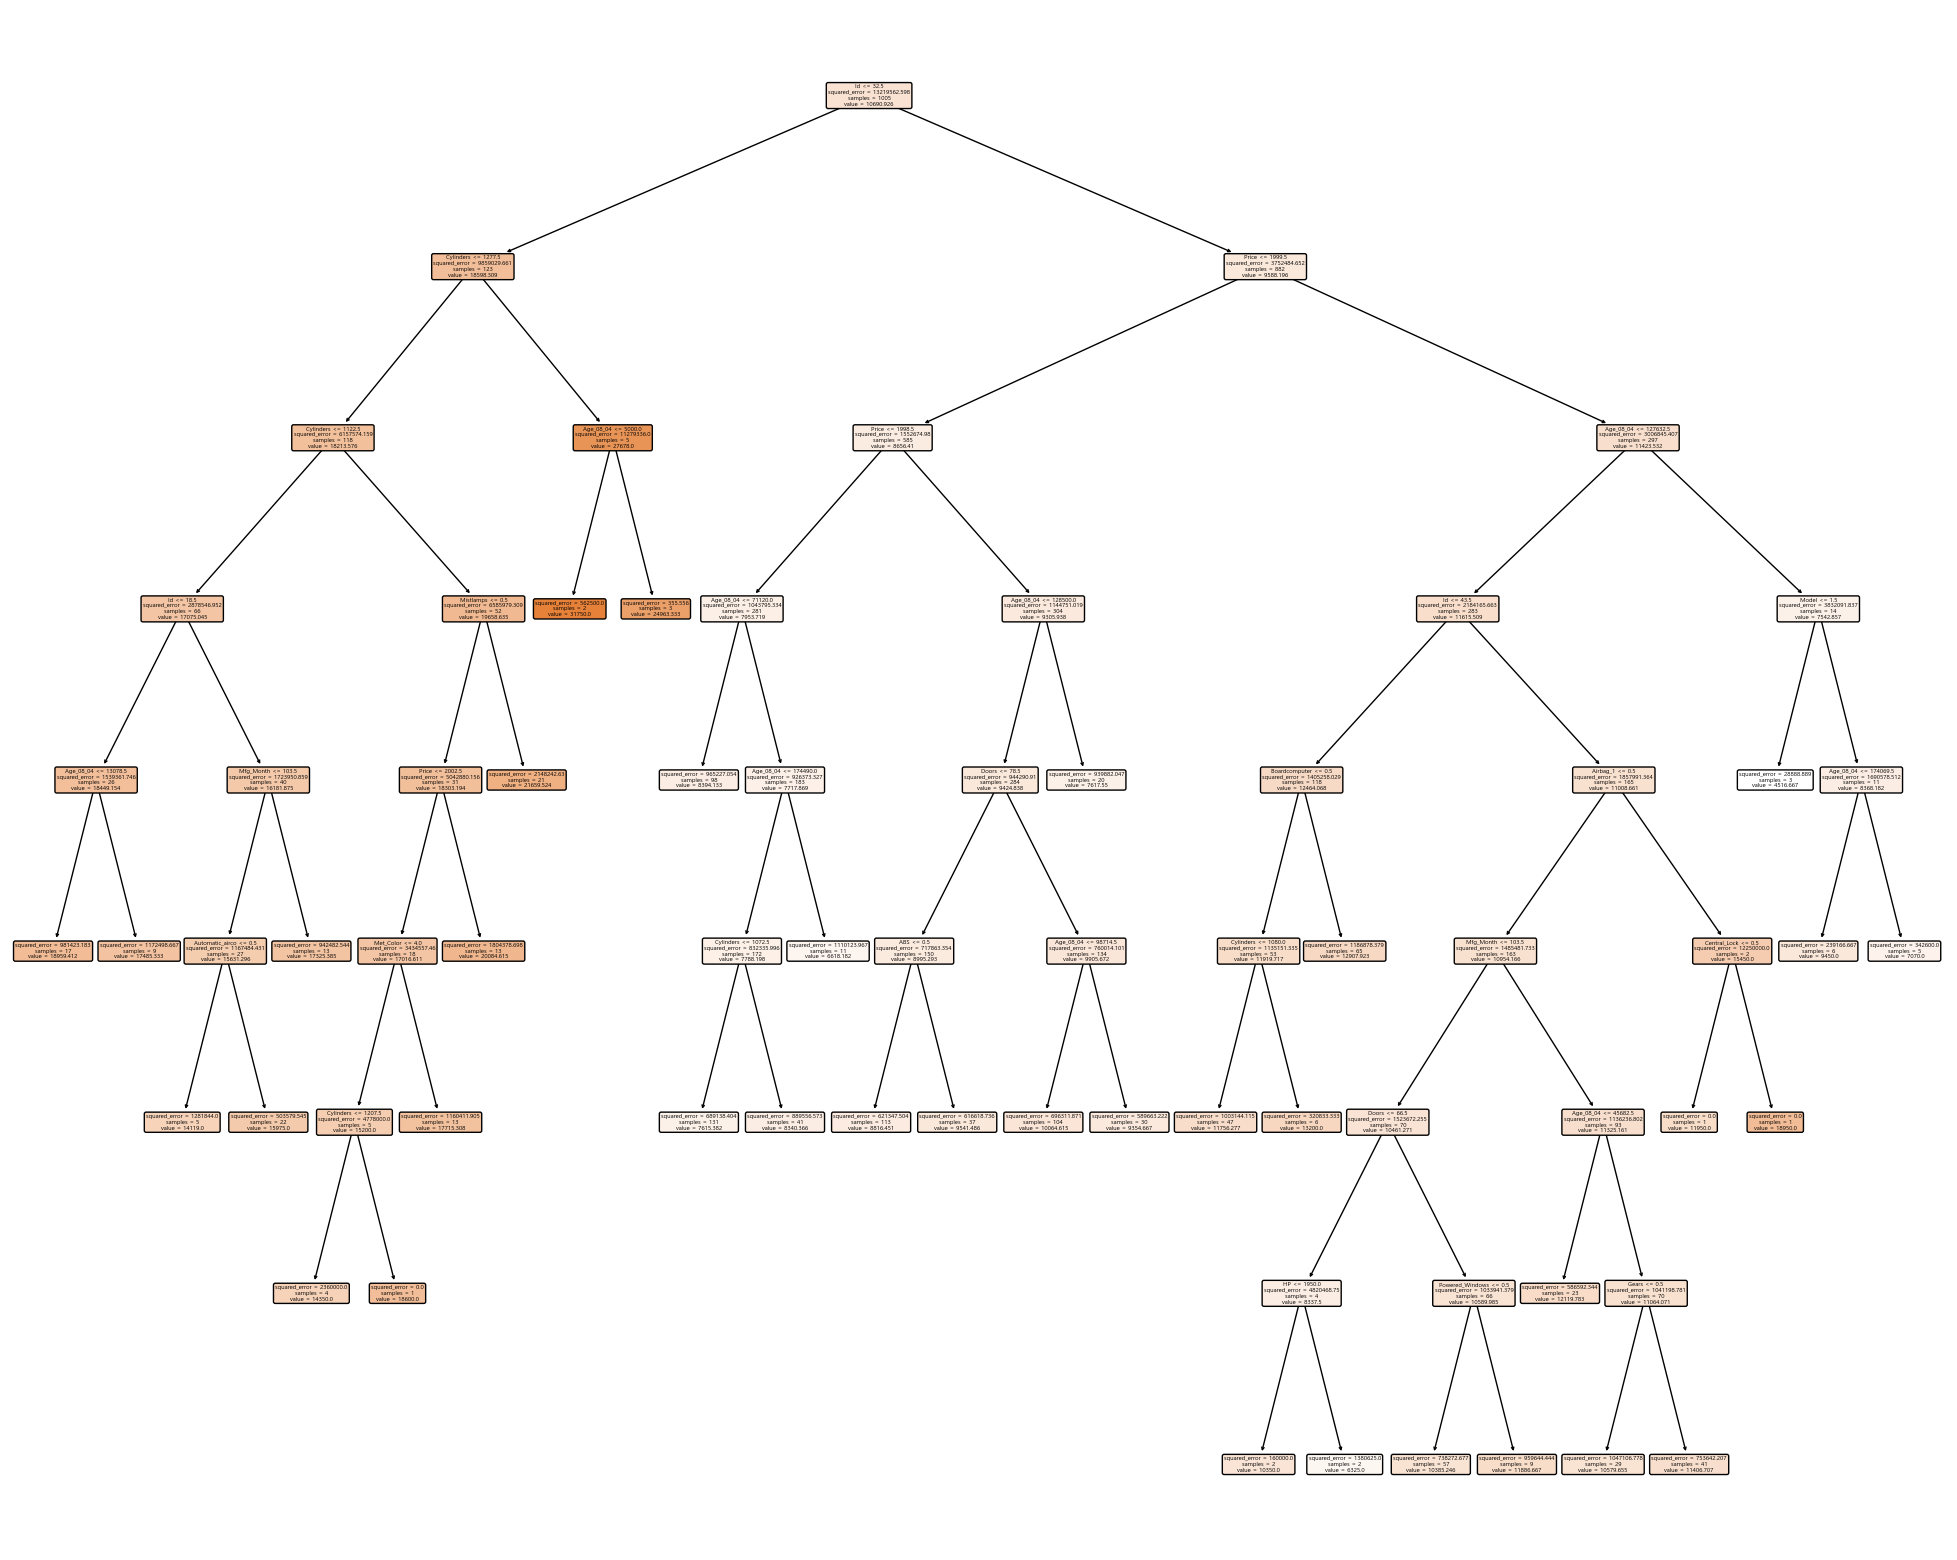

In [74]:
best_reg=regs[np.argmax(test_scores)]

fig = plt.figure(figsize=(25,20))
_=plot_tree(best_reg,
            feature_names=corolla.columns.values,
            rounded=True,
            filled =True
)

In [76]:
#Prediction
RT_corolla_prey=best_reg.predict(X_test)

#Compare
Perf_Table.iloc[1]=perf_eval(y_test,RT_corolla_prey)
Perf_Table

,RMSE,MAE,MAPE
MLR,1219.170176,874.365151,8.648188
Regression Tree,1157.076571,913.977212,9.14139
